![example](images/director_shot.jpeg)

# Microsoft Movie Studios Analysis

**Authors:** Dermot O'Brien, Ziyuan Wang
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [75]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

conn = sqlite3.connect('./zippedData/im.db')

In [76]:
ls zippedData

 Volume in drive C is Windows
 Volume Serial Number is 0CB4-0C01

 Directory of C:\Users\Terry\documents\flatiron\project1\Microsoft-Movie-Studios-Project\zippedData

10/05/2022  11:59 AM    <DIR>          .
10/05/2022  12:40 PM    <DIR>          ..
10/03/2022  10:15 AM            53,544 bom.movie_gross.csv.gz
12/20/2021  04:31 PM       169,443,328 im.db
10/05/2022  11:59 AM        67,149,708 im.db.zip
10/03/2022  10:15 AM           498,202 rt.movie_info.tsv.gz
10/03/2022  10:15 AM         3,402,194 rt.reviews.tsv.gz
10/03/2022  10:15 AM           827,840 tmdb.movies.csv.gz
10/03/2022  10:15 AM           153,218 tn.movie_budgets.csv.gz
               7 File(s)    241,528,034 bytes
               2 Dir(s)  413,744,508,928 bytes free


In [77]:
# creating dataframe from The numbers

tn_movies_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [78]:
#how tn_moives look in genreal
tn_movies_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [79]:
#the the steps below, since the type of cells for budget and gross are all strings, we want to convert them into integers.
#these just some processes to get rid of '$' and ","
tn_movies_df['production_budget'] = tn_movies_df['production_budget'].str.strip('$')

tn_movies_df['production_budget'] = tn_movies_df['production_budget'].str.replace(',','')

tn_movies_df['production_budget'] = tn_movies_df['production_budget'].astype(int)

tn_movies_df['domestic_gross'] = tn_movies_df['domestic_gross'].str.strip('$')

tn_movies_df['domestic_gross'] = tn_movies_df['domestic_gross'].str.replace(',','')

tn_movies_df['domestic_gross'] = tn_movies_df['domestic_gross'].astype(int)

tn_movies_df['worldwide_gross'] = tn_movies_df['worldwide_gross'].str.strip('$')

tn_movies_df['worldwide_gross'] = tn_movies_df['worldwide_gross'].str.replace(',','')

tn_movies_df['worldwide_gross'] = tn_movies_df['worldwide_gross'].astype('int64')

In [46]:
#Create a copy of tn_moives for further uses
tn1 = tn_movies_df.copy()

In [47]:
#Create a dataframe with moive ids,moive titles and genres from moives_basics table 
im1_df = pd.read_sql("""
SELECT 
       movie_id AS movie_id,
       original_title AS original_title,
       runtime_minutes AS runtime_minutes,
       genres AS genres
FROM movie_basics


""", conn)
im1_df

,movie_id,original_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary
146141,tt9916706,Dankyavar Danka,NaN,Comedy
146142,tt9916730,6 Gunn,116.0,None


In [80]:
#Create a dataframe called im2_df with all the information from moives_ratings table 
im2_df = pd.read_sql("""
SELECT *
FROM movie_ratings

""", conn)
im2_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [81]:
# Merge the dataframes of tn and im1 on moive titles using an inner join
Merged_df = tn1.merge(im1_df,
          left_on='movie',
          right_on='original_title',
          how='inner')
Merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...
3532,68,"Jul 6, 2001",Cure,10000,94596,94596,tt5936960,Cure,NaN,None
3533,70,"Apr 1, 1996",Bang,10000,527,527,tt6616538,Bang,NaN,None
3534,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,Newlyweds,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,Red 11,77.0,"Horror,Sci-Fi,Thriller"


In [82]:
## Merge the dataframes of previous merged dataframe and im2 on moive ids using an inner join
TB_IM_Merged = Merged_df.merge(im2_df,
          left_on='movie_id',
          right_on='movie_id',
          how='inner')
TB_IM_Merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135
...,...,...,...,...,...,...,...,...,...,...,...,...
2633,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,tt3973612,Stories of Our Lives,60.0,Drama,7.5,85
2634,68,"Jul 6, 2001",Cure,10000,94596,94596,tt1872026,Cure,93.0,Drama,4.9,11
2635,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,Newlyweds,95.0,"Comedy,Drama",6.4,1436
2636,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,Red 11,77.0,"Horror,Sci-Fi,Thriller",5.6,43


In [85]:
#make a new dataframe with information that will be used in data analysis
TB_IM1 = TB_IM_Merged[['movie', 'production_budget', 'domestic_gross','worldwide_gross','genres','averagerating','numvotes']]
TB_IM1

,movie,production_budget,domestic_gross,worldwide_gross,genres,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",6.6,447624
1,Dark Phoenix,350000000,42762350,149762350,"Action,Adventure,Sci-Fi",6.0,24451
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",7.3,665594
3,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",8.5,670926
4,Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy",6.5,329135
...,...,...,...,...,...,...,...
2633,Stories of Our Lives,15000,0,0,Drama,7.5,85
2634,Cure,10000,94596,94596,Drama,4.9,11
2635,Newlyweds,9000,4584,4584,"Comedy,Drama",6.4,1436
2636,Red 11,7000,0,0,"Horror,Sci-Fi,Thriller",5.6,43


In [88]:
#the numbers for budget and gross are too huge
#just trying to convert the units from dollars to million dollars to make it easier to look
TB_IM1['production_budget(million)'] = TB_IM1['production_budget']/ 1000000

TB_IM1['domestic_gross(million)'] = TB_IM1['domestic_gross']/ 1000000

TB_IM1['worldwide_gross(million)'] = TB_IM1['worldwide_gross']/ 1000000

<ipython-input-88-5291a052dff4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_IM1['production_budget(million)'] = TB_IM1['production_budget']/ 1000000
<ipython-input-88-5291a052dff4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_IM1['domestic_gross(million)'] = TB_IM1['domestic_gross']/ 1000000
<ipython-input-88-5291a052dff4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [89]:
#creating a column with the calculated profit in million dollars
TB_IM1['profit(million)'] = TB_IM1['worldwide_gross(million)'] + TB_IM1['domestic_gross(million)'] - TB_IM1['production_budget(million)']

<ipython-input-89-6f5a2e59b82f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_IM1['profit(million)'] = TB_IM1['worldwide_gross(million)'] + TB_IM1['domestic_gross(million)'] - TB_IM1['production_budget(million)']


In [90]:
# Found out the primary genre since we only want to focus on the primary genre
TB_IM1['genre1'] = TB_IM1['genres'].str.split(",").str[0]

In [110]:
#Filter out rows with ratings > 6.0, number of votes > 10000, profit more than 400 million
TB_IM2 = TB_IM1.loc[(TB_IM1['averagerating'] > 6) & (TB_IM1['numvotes'] > 10000) & (TB_IM1['profit(million)'] > 400)]
TB_IM2

,movie,production_budget,domestic_gross,worldwide_gross,genres,averagerating,numvotes,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),genre1
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",6.6,447624,410.6,241.063875,1045.663875,876.127750,Action
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",7.3,665594,330.6,459.005868,1403.013963,1531.419831,Action
3,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",8.5,670926,300.0,678.815482,2048.134200,2426.949682,Action
4,Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy",6.5,329135,300.0,229.024295,655.945209,584.969504,Action
5,Spectre,300000000,200074175,879620923,"Action,Adventure,Thriller",6.8,352504,300.0,200.074175,879.620923,779.695098,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
1416,Halloween,10000000,159342015,254900667,"Horror,Thriller",6.6,88395,10.0,159.342015,254.900667,404.242682,Horror
1514,Black Swan,13000000,106954678,331266710,"Drama,Thriller",8.0,648854,13.0,106.954678,331.266710,425.221388,Drama
1548,The Fault in Our Stars,12000000,124872350,307166834,"Drama,Romance",7.7,315135,12.0,124.872350,307.166834,420.039184,Drama
1932,Get Out,5000000,176040665,255367951,"Horror,Mystery,Thriller",7.7,400474,5.0,176.040665,255.367951,426.408616,Horror


In [96]:
#make a new dataframe with information that will be used in data analysis
TB_IM_Final = TB_IM2[['movie', 'genre1','production_budget(million)','domestic_gross(million)','worldwide_gross(million)','profit(million)','averagerating','numvotes']]
TB_IM_Final

,movie,genre1,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,Action,410.6,241.063875,1045.663875,876.127750,6.6,447624
2,Avengers: Age of Ultron,Action,330.6,459.005868,1403.013963,1531.419831,7.3,665594
3,Avengers: Infinity War,Action,300.0,678.815482,2048.134200,2426.949682,8.5,670926
4,Justice League,Action,300.0,229.024295,655.945209,584.969504,6.5,329135
5,Spectre,Action,300.0,200.074175,879.620923,779.695098,6.8,352504
...,...,...,...,...,...,...,...,...
1416,Halloween,Horror,10.0,159.342015,254.900667,404.242682,6.6,88395
1514,Black Swan,Drama,13.0,106.954678,331.266710,425.221388,8.0,648854
1548,The Fault in Our Stars,Drama,12.0,124.872350,307.166834,420.039184,7.7,315135
1932,Get Out,Horror,5.0,176.040665,255.367951,426.408616,7.7,400474


Text(0.5, 1.0, 'Relationship Between Ratings and Profit(Profit>400million)')

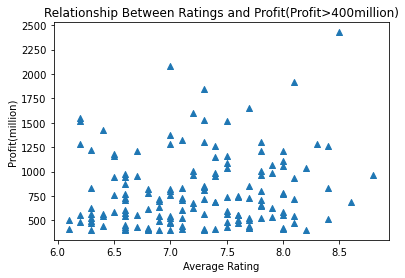

In [98]:
#Make a scatter plt with rating as x-axis and profit as y-axis
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x=TB_IM_Final['averagerating'], y=TB_IM_Final['profit(million)'],
           marker='^')

ax.set_xlabel('Average Rating')
ax.set_ylabel('Profit(million)')
ax.set_title('Relationship Between Ratings and Profit(Profit>400million)')

In [125]:
#Caculate the average profit group by primary genre type in desc order
profit_for_each_genre = TB_IM_Final.groupby('genre1')['profit(million)'].mean().sort_values(ascending=False)
profit_for_each_genre

genre1
Family       1283.851135
Adventure     859.972824
Action        829.657800
Biography     646.688504
Animation     639.195415
Comedy        552.560102
Drama         531.802121
Horror        512.885821
Name: profit(million), dtype: float64

Text(0, 0.5, 'Average profit(million)')

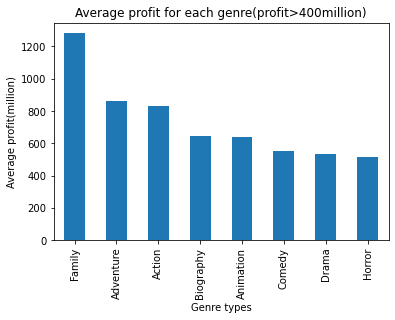

In [126]:
#Plot a bar chart with data above
profit_for_each_genre.plot(kind = 'bar', title = 'Average profit for each genre(profit>400million)')


plt.xlabel("Genre types")
plt.ylabel("Average profit(million)")

In [124]:
***** Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.
***

SyntaxError: invalid syntax (<ipython-input-124-c434be10b357>, line 1)

In [116]:
#Filter out rows with ratings > 6.0, number of votes > 10000, profit more than 200 million
TB_IM22 = TB_IM1.loc[(TB_IM1['averagerating'] > 6) & (TB_IM1['numvotes'] > 10000) & (TB_IM1['profit(million)'] > 200)]
TB_IM22

,movie,production_budget,domestic_gross,worldwide_gross,genres,averagerating,numvotes,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),genre1
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",6.6,447624,410.6,241.063875,1045.663875,876.127750,Action
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",7.3,665594,330.6,459.005868,1403.013963,1531.419831,Action
3,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",8.5,670926,300.0,678.815482,2048.134200,2426.949682,Action
4,Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy",6.5,329135,300.0,229.024295,655.945209,584.969504,Action
5,Spectre,300000000,200074175,879620923,"Action,Adventure,Thriller",6.8,352504,300.0,200.074175,879.620923,779.695098,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Dangal,9500000,12391761,294654618,"Action,Biography,Drama",8.5,123638,9.5,12.391761,294.654618,297.546379,Action
1838,Magic Mike,7000000,113721571,170549753,"Comedy,Drama",6.1,123955,7.0,113.721571,170.549753,277.271324,Comedy
1932,Get Out,5000000,176040665,255367951,"Horror,Mystery,Thriller",7.7,400474,5.0,176.040665,255.367951,426.408616,Horror
1936,Split,5000000,138141585,278964806,"Horror,Thriller",7.3,358543,5.0,138.141585,278.964806,412.106391,Horror


In [112]:
#make a new dataframe with information that will be used in data analysis
TB_IM_Final22 = TB_IM22[['movie', 'genre1','production_budget(million)','domestic_gross(million)','worldwide_gross(million)','profit(million)','averagerating','numvotes']]
TB_IM_Final22

,movie,genre1,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,Action,410.6,241.063875,1045.663875,876.127750,6.6,447624
2,Avengers: Age of Ultron,Action,330.6,459.005868,1403.013963,1531.419831,7.3,665594
3,Avengers: Infinity War,Action,300.0,678.815482,2048.134200,2426.949682,8.5,670926
4,Justice League,Action,300.0,229.024295,655.945209,584.969504,6.5,329135
5,Spectre,Action,300.0,200.074175,879.620923,779.695098,6.8,352504
...,...,...,...,...,...,...,...,...
1740,Dangal,Action,9.5,12.391761,294.654618,297.546379,8.5,123638
1838,Magic Mike,Comedy,7.0,113.721571,170.549753,277.271324,6.1,123955
1932,Get Out,Horror,5.0,176.040665,255.367951,426.408616,7.7,400474
1936,Split,Horror,5.0,138.141585,278.964806,412.106391,7.3,358543


In [131]:
#Caculate the average profit group by primary genre type in desc order
profit_for_each_genre2 = TB_IM_Final22.groupby('genre1')['profit(million)'].mean().sort_values(ascending=False)
profit_for_each_genre2

genre1
Family       1283.851135
Adventure     654.411631
Animation     639.195415
Action        627.305278
Horror        432.255446
Drama         382.313646
Comedy        364.790557
Biography     360.167801
Mystery       296.755338
Crime         279.865307
Name: profit(million), dtype: float64

Text(0, 0.5, 'Average profit(million)')

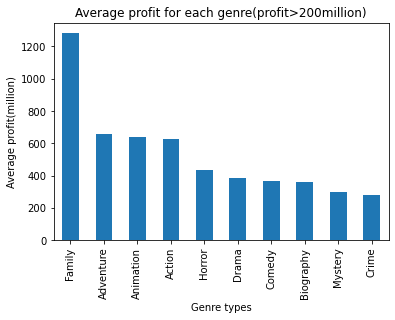

In [132]:
#Plot a bar chart with data above
profit_for_each_genre2.plot(kind = 'bar', title = 'Average profit for each genre(profit>200million)')


plt.xlabel("Genre types")
plt.ylabel("Average profit(million)")

In [117]:
#Filter out rows with ratings > 6.0, number of votes > 10000, profit more than 100 million
TB_IM222 = TB_IM1.loc[(TB_IM1['averagerating'] > 6) & (TB_IM1['numvotes'] > 10000) & (TB_IM1['profit(million)'] > 100)]
TB_IM222

,movie,production_budget,domestic_gross,worldwide_gross,genres,averagerating,numvotes,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),genre1
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",6.6,447624,410.6,241.063875,1045.663875,876.127750,Action
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",7.3,665594,330.6,459.005868,1403.013963,1531.419831,Action
3,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",8.5,670926,300.0,678.815482,2048.134200,2426.949682,Action
4,Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy",6.5,329135,300.0,229.024295,655.945209,584.969504,Action
5,Spectre,300000000,200074175,879620923,"Action,Adventure,Thriller",6.8,352504,300.0,200.074175,879.620923,779.695098,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
1945,The Visit,5000000,65206105,98677816,"Horror,Mystery,Thriller",6.2,102459,5.0,65.206105,98.677816,158.883921,Horror
1947,Happy Death Day,5000000,55683845,125010260,"Horror,Mystery,Thriller",6.5,87132,5.0,55.683845,125.010260,175.694105,Horror
2129,War Room,3000000,67790117,73975239,Drama,6.5,11716,3.0,67.790117,73.975239,138.765356,Drama
2131,Sinister,3000000,48086903,87727807,"Horror,Mystery,Thriller",6.8,198345,3.0,48.086903,87.727807,132.814710,Horror


In [118]:
#make a new dataframe with information that will be used in data analysis
TB_IM_Final222 = TB_IM222[['movie', 'genre1','production_budget(million)','domestic_gross(million)','worldwide_gross(million)','profit(million)','averagerating','numvotes']]
TB_IM_Final222

,movie,genre1,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,Action,410.6,241.063875,1045.663875,876.127750,6.6,447624
2,Avengers: Age of Ultron,Action,330.6,459.005868,1403.013963,1531.419831,7.3,665594
3,Avengers: Infinity War,Action,300.0,678.815482,2048.134200,2426.949682,8.5,670926
4,Justice League,Action,300.0,229.024295,655.945209,584.969504,6.5,329135
5,Spectre,Action,300.0,200.074175,879.620923,779.695098,6.8,352504
...,...,...,...,...,...,...,...,...
1945,The Visit,Horror,5.0,65.206105,98.677816,158.883921,6.2,102459
1947,Happy Death Day,Horror,5.0,55.683845,125.010260,175.694105,6.5,87132
2129,War Room,Drama,3.0,67.790117,73.975239,138.765356,6.5,11716
2131,Sinister,Horror,3.0,48.086903,87.727807,132.814710,6.8,198345


In [134]:
#Caculate the average profit group by primary genre type in desc order
profit_for_each_genre222 = TB_IM_Final222.groupby('genre1')['profit(million)'].mean().sort_values(ascending=False)
profit_for_each_genre222

genre1
Family       1283.851135
Animation     639.195415
Adventure     570.984484
Action        509.870158
Horror        316.502023
Mystery       296.755338
Drama         257.070817
Biography     253.801585
Comedy        218.774121
Crime         203.159902
Romance       139.226970
Fantasy       135.018212
Name: profit(million), dtype: float64

Text(0, 0.5, 'Average profit(million)')

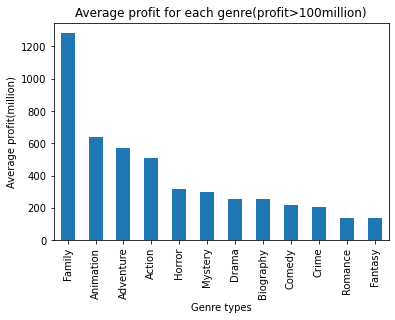

In [136]:
#Plot a bar chart with data above
profit_for_each_genre222.plot(kind = 'bar', title = 'Average profit for each genre(profit>100million)')


plt.xlabel("Genre types")
plt.ylabel("Average profit(million)")

In [139]:
#Filter out rows with ratings > 6.0, number of votes > 10000, budget more than 10 million
TB_IM3 = TB_IM1.loc[(TB_IM1['averagerating'] > 6) & (TB_IM1['numvotes'] > 10000) & (TB_IM1['production_budget(million)'] > 10)]
TB_IM3

,movie,production_budget,domestic_gross,worldwide_gross,genres,averagerating,numvotes,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),genre1
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",6.6,447624,410.6,241.063875,1045.663875,876.127750,Action
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",7.3,665594,330.6,459.005868,1403.013963,1531.419831,Action
3,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",8.5,670926,300.0,678.815482,2048.134200,2426.949682,Action
4,Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy",6.5,329135,300.0,229.024295,655.945209,584.969504,Action
5,Spectre,300000000,200074175,879620923,"Action,Adventure,Thriller",6.8,352504,300.0,200.074175,879.620923,779.695098,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Woman in Gold,11000000,33307793,58586407,"Biography,Drama,History",7.3,48501,11.0,33.307793,58.586407,80.894200,Biography
1604,"I, Tonya",11000000,30014534,53797409,"Biography,Comedy,Drama",7.5,141668,11.0,30.014534,53.797409,72.811943,Biography
1605,Quartet,11000000,18388357,56178935,"Comedy,Drama",6.8,17979,11.0,18.388357,56.178935,63.567292,Comedy
1606,Inside Llewyn Davis,11000000,13248209,32943247,"Drama,Music",7.5,123759,11.0,13.248209,32.943247,35.191456,Drama


Text(0.5, 1.0, 'Relationship Between Ratings and Budget(10million<Budget<100million)')

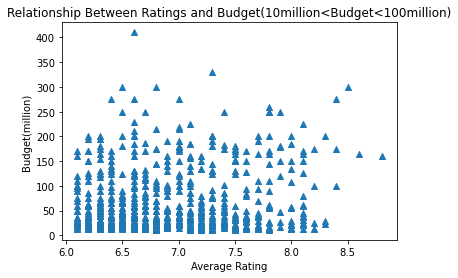

In [140]:
#Make a scatter plt with rating as x-axis and budget as y-axis
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x=TB_IM3['averagerating'], y=TB_IM3['production_budget(million)'],
           marker='^')

ax.set_xlabel('Average Rating')
ax.set_ylabel('Budget(million)')
ax.set_title('Relationship Between Ratings and Budget(10million<Budget<100million)')

In [141]:
#Caculate the average budget group by primary genre type in desc order
budget_for_each_genre = TB_IM3.groupby('genre1')['production_budget(million)'].mean().sort_values(ascending=False)
budget_for_each_genre

genre1
Adventure    103.165000
Action        95.673897
Family        90.000000
Animation     58.285714
Mystery       52.333333
Romance       50.200000
Horror        36.214286
Drama         32.947059
Comedy        32.346667
Crime         32.146667
Biography     30.373077
Sci-Fi        25.000000
Fantasy       18.500000
Music         18.000000
Name: production_budget(million), dtype: float64

Text(0, 0.5, 'Average budget(million)')

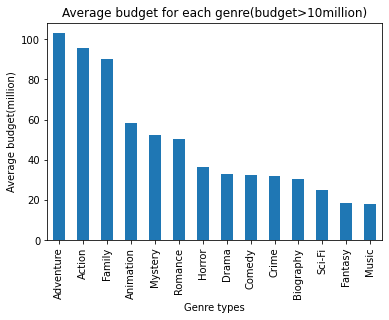

In [145]:
#Plot a bar chart with data above
budget_for_each_genre.plot(kind = 'bar', title = 'Average budget for each genre(budget>10million)')


plt.xlabel("Genre types")
plt.ylabel("Average budget(million)")

In [155]:
#Filter out rows with ratings > 6.0, number of votes > 10000, budget more than 10 million, and profit more than 400million
TB_IM4 = TB_IM1.loc[(TB_IM1['averagerating'] > 6) & (TB_IM1['numvotes'] > 10000) & (TB_IM1['production_budget(million)'] > 10) & (TB_IM1['profit(million)'] > 400)]
TB_IM4

,movie,production_budget,domestic_gross,worldwide_gross,genres,averagerating,numvotes,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),genre1
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",6.6,447624,410.6,241.063875,1045.663875,876.127750,Action
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",7.3,665594,330.6,459.005868,1403.013963,1531.419831,Action
3,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",8.5,670926,300.0,678.815482,2048.134200,2426.949682,Action
4,Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy",6.5,329135,300.0,229.024295,655.945209,584.969504,Action
5,Spectre,300000000,200074175,879620923,"Action,Adventure,Thriller",6.8,352504,300.0,200.074175,879.620923,779.695098,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
1186,Wonder,20000000,132422809,304604712,"Drama,Family",8.0,111632,20.0,132.422809,304.604712,417.027521,Drama
1298,Neighbors,18000000,150086800,270944428,Comedy,6.3,266020,18.0,150.086800,270.944428,403.031228,Comedy
1363,A Quiet Place,17000000,188024361,334522294,"Drama,Horror,Sci-Fi",7.6,305031,17.0,188.024361,334.522294,505.546655,Drama
1514,Black Swan,13000000,106954678,331266710,"Drama,Thriller",8.0,648854,13.0,106.954678,331.266710,425.221388,Drama


Text(0.5, 1.0, 'Relationship Between Budget and Profit')

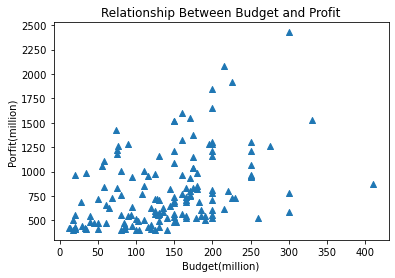

In [156]:
#Make a scatter plt with budget as x-axis and profit as y-axis
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x=TB_IM4['production_budget(million)'], y=TB_IM4['profit(million)'],
           marker='^')

ax.set_xlabel('Budget(million)')
ax.set_ylabel('Porfit(million)')
ax.set_title('Relationship Between Budget and Profit')

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [181]:
# creating dataframe from tmdb
tmdb_moives_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tmdb_moives_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [201]:
#Create a dictionary with genreid and its corresponding genre type
tmdn_genreid = {28:"Action",
                12:"Adventure",
                16:"Animation",
                35:"Comedy",
                80:"Crime",
                99: "Documentary",
                18: "Drama",
                10751: "Family",
                14: "Fantasy",
                36: "History",
                27: "Horror",
                10402: "Music",
                9648:"Mystery",
                10749: "Romance",
                878: "Science Fiction",
                10770: "TV Movie",
                53: "Thriller",
                10752: "War",
                37: "Western"}

In [202]:
#Filter the dataframe with no empty content in genre_ids
tmdb_moives_df = tmdb_moives_df.loc[tmdb_moives_df['genre_ids'] != '[]']

In [203]:
#Obtain the primary genre id and get rid of "," and "[]"
tmdb_moives_df['genre1'] = tmdb_moives_df['genre_ids'].str.split(",").str[0]
tmdb_moives_df['genre1'] = tmdb_moives_df['genre1'].str.strip('[')
tmdb_moives_df['genre1'] = tmdb_moives_df['genre1'].str.strip(']')

In [204]:
#Convert the type of primary genre id from string to integer
tmdb_moives_df['genre1'] = tmdb_moives_df['genre1'].astype(int)

In [205]:
#Create a new column with genre type name with the dictionary created above and genre ids
tmdb_moives_df['genre1_name'] = tmdb_moives_df['genre1'].map(tmdn_genreid)

tmdb_moives_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre1,genre1_name
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12,Adventure
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14,Fantasy
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,12,Adventure
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,16,Animation
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,28,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,27,Horror
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,18,Drama
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,14,Fantasy
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,10751,Family


In [206]:
#Create a copy for future use
tmdb_moives1_df = tmdb_moives_df.copy()

In [207]:
#Filter out rows with number of votes > 5000 and average rate not as zero
tmdb_moives11_df = tmdb_moives1_df.loc[(tmdb_moives1_df['vote_count'] >= 5000) & (tmdb_moives1_df['vote_average'] != 0.0)]

In [208]:
#Caculate the average rating group by primary genre type in desc order
rate_for_each_genre = tmdb_moives11_df.groupby('genre1_name')['vote_average'].mean().sort_values(ascending=False)
rate_for_each_genre

genre1_name
History            8.100000
Romance            7.775000
Mystery            7.700000
Drama              7.607317
Animation          7.605882
Crime              7.536364
Western            7.400000
War                7.400000
Fantasy            7.280000
Horror             7.275000
Family             7.250000
Thriller           7.175000
Adventure          7.151852
Comedy             7.057143
Science Fiction    7.015385
Action             6.946341
Name: vote_average, dtype: float64

Text(0, 0.5, 'Average ratings')

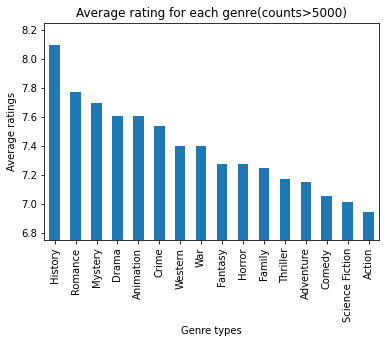

In [209]:
#Plot a bar chart with data above
rate_for_each_genre.plot(kind = 'bar', title = 'Average rating for each genre(counts>5000)', ylim=(6.75, 8.25))


plt.xlabel("Genre types")
plt.ylabel("Average ratings")


In [210]:
#Filter out rows with number of votes > 2000 and average rate not as zero
tmdb_moives111_df = tmdb_moives1_df.loc[(tmdb_moives1_df['vote_count'] >= 2000) & (tmdb_moives1_df['vote_average'] != 0.0)]

In [211]:
#Caculate the average rating group by primary genre type in desc order
rate_for_each_genre1 = tmdb_moives111_df.groupby('genre1_name')['vote_average'].mean().sort_values(ascending=False)
rate_for_each_genre1

genre1_name
Romance            7.485714
Western            7.400000
History            7.350000
Drama              7.260150
Animation          7.167742
Family             7.137500
Crime              7.128000
War                7.100000
Mystery            6.766667
Thriller           6.710000
Adventure          6.694030
Comedy             6.685484
Science Fiction    6.637931
Action             6.554737
Horror             6.508571
Fantasy            6.422727
Name: vote_average, dtype: float64

Text(0, 0.5, 'Average ratings')

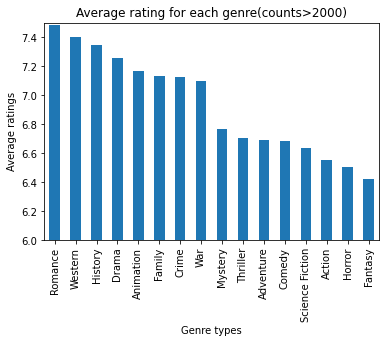

In [212]:
#Plot a bar chart with data above
rate_for_each_genre1.plot(kind = 'bar', title = 'Average rating for each genre(counts>2000)', ylim=(6, 7.5))


plt.xlabel("Genre types")
plt.ylabel("Average ratings")


In [213]:
#Filter out rows with number of votes > 1000 and average rate not as zero
tmdb_moives1111_df = tmdb_moives1_df.loc[(tmdb_moives1_df['vote_count'] >= 1000) & (tmdb_moives1_df['vote_average'] != 0.0)]

In [214]:
#Caculate the average rating group by primary genre type in desc order
rate_for_each_genre11 = tmdb_moives1111_df.groupby('genre1_name')['vote_average'].mean().sort_values(ascending=False)
rate_for_each_genre11

genre1_name
Western            7.400000
History            7.380000
Music              7.250000
Romance            7.075000
Family             7.070000
Drama              7.067949
Animation          7.055769
Crime              6.872917
TV Movie           6.800000
War                6.785714
Mystery            6.773333
Science Fiction    6.632432
Adventure          6.568817
Comedy             6.537013
Thriller           6.536508
Action             6.496000
Fantasy            6.430303
Horror             6.242857
Name: vote_average, dtype: float64

Text(0, 0.5, 'Average ratings')

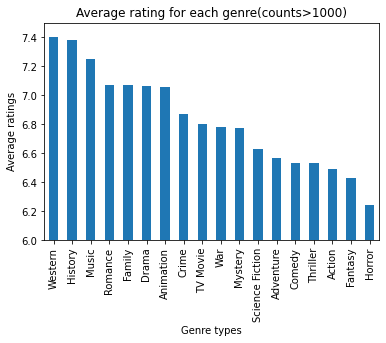

In [215]:
#Plot a bar chart with data above
rate_for_each_genre11.plot(kind = 'bar', title = 'Average rating for each genre(counts>1000)', ylim=(6, 7.5))


plt.xlabel("Genre types")
plt.ylabel("Average ratings")


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***